In [141]:
%load_ext autoreload
%autoreload 2
from utils import prepareDatase, residual,get_n_features
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [122]:
dd = prepareDatase()
X_train, y_train, X_test, y_test = \
        dd.get_train_test("realEstate.xlsx",False,0.7,True)
dd

Parameter : dataset,normalized,ratio of train to test to split the dataset,split the dataset into (x_train, y_train, x_test, y_test).
 Methods: 
 noramilize_theDatst : Normalize dataset feature wise.
 splitInto_test_train : split dataset into given feature
 get_train_test : returns train and test set queries.

In [123]:
reg = LinearRegression().fit(X_train,y_train);

In [124]:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test.values, y_pred)
rmse = np.sqrt(mse) 
print ("the value of RMS ---> ",rmse)

the value of RMS --->  8.10991552017


In [125]:
print ("the value of theata0 is : ",reg.intercept_[0])
for i in range(len(reg.coef_[0])):
    print ("the value of theata"+str(i+1),"is : ",reg.coef_[0][i])


the value of theata0 is :  -12536.1708397
the value of theata1 is :  6.24466244863
the value of theata2 is :  -0.254916328567
the value of theata3 is :  -0.00506216361666
the value of theata4 is :  1.03473998552
the value of theata5 is :  188.005855671
the value of theata6 is :  -38.5558488583


The coefficients tell us about which feature is more important than others. The model is more biased towards the feature corresponding to the higher coefficient.


## Normalizing dataset

In [126]:
X_train_n, y_train_n, X_test_n, y_test_n = \
        dd.get_train_test("realEstate.xlsx", True,0.7,True)

In [127]:
reg_n = LinearRegression().fit(X_train_n,y_train_n)

In [128]:
print ("the value of theata0 is : ",reg_n.intercept_[0])
for i in range(len(reg_n.coef_[0])):
    print ("the value of theata"+str(i+1),"is : ",reg_n.coef_[0][i])


the value of theata0 is :  0.255029005965
the value of theata1 is :  0.0397014609035
the value of theata2 is :  -0.0888366514319
the value of theata3 is :  -0.311590072609
the value of theata4 is :  0.0840740235186
the value of theata5 is :  0.16354323649
the value of theata6 is :  -0.0320631531443


In [129]:
y_pred = reg_n.predict(X_test)
rmse = np.sqrt(np.sqrt(mean_squared_error(y_test,y_pred)))
print ("the value of RMS ---> ",rmse)

the value of RMS --->  21.665703733


### Residual Plot

In [130]:
theata = np.append(reg.intercept_,reg.coef_)
theata = np.matrix(theata).transpose()
theata_n = np.append(reg_n.intercept_,reg_n.coef_)
theata_n = np.matrix(theata_n).transpose()

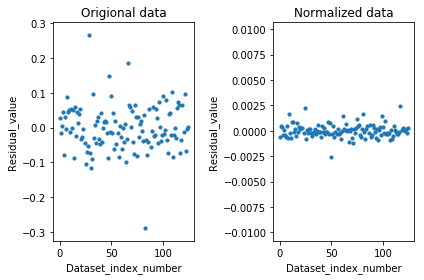

In [131]:
residual_dist = (1/len(X_test))*residual(X_test,y_test,theata)
plt.subplot(1,2,1)
plt.scatter(np.arange(len(X_test)),\
            residual_dist[residual_dist.columns[-1]].tolist(),\
            s=10);
plt.xlabel("Dataset_index_number")
plt.ylabel("Residual_value");
plt.title("Origional data")
#normalized
plt.subplot(1,2,2)
residual_dist_n = (1/len(X_test_n))*residual(X_test_n,y_test_n,theata_n)
plt.subplot(1,2,2)
plt.scatter(np.arange(len(X_test_n)),\
            residual_dist_n[residual_dist_n.columns[-1]].tolist(),\
            s=10);
plt.xlabel("Dataset_index_number")
plt.ylabel("Residual_value");
plt.title("Normalized data")
plt.tight_layout()

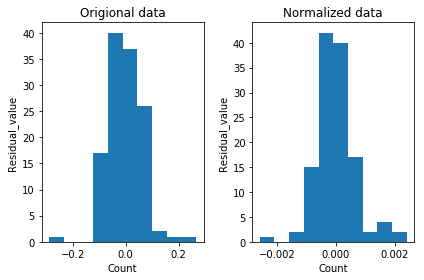

In [132]:
plt.subplot(1,2,1)
plt.hist(residual_dist[residual_dist.columns[-1]].tolist());
plt.xlabel("Count")
plt.ylabel("Residual_value");
plt.title("Origional data")
plt.subplot(1,2,2)

plt.hist(residual_dist_n[residual_dist_n.columns[-1]].tolist());
plt.xlabel("Count")
plt.ylabel("Residual_value");
plt.title("Normalized data")
plt.tight_layout()

# Optimal feature selection using 


In [134]:
trainset,testset = \
        dd.get_train_test("realEstate.xlsx",False,0.7,False)

In [145]:
#data prepration

feature_count = [1,2,3,4]
feature_dict = {}
for j in feature_count:
    #gets all the possible combination of features 
    ret = [list(i) for i in get_n_features(\
                            trainset[trainset.columns[:-1]],j)]
    feature_dict[j] = ret
    
#feature_dict[2] : all possible combination of 2 features